# Linear Quadratic Control of an Inverted Pendulum
In this live script we use the infinite horizon linear quadratic framework, 
typically referred to as LQR (Linear Quadratic Regulator) to control an inverted 
pendulum, assuming that the full state of the system is available for feedback.

Let us start by recalling the infinite-horizon linear quadratic regulator 
framework. It is specified by an infinite-horizon quadratic cost function

$$\sum_{k=0}^{\infty}x_k^{T}\,\,Qx_k+u_k^TRu_k+x_h^T Q_hx_h $$

and a linear model

$$ x_{k+1}=Ax_k+Bu_k$$

where $k\in\{0,\dots,h-1\}$. 

Under mild assumptions, the optimal policy is

$$u_k = Kx_k$$ 

where

$$K = -(R+B^T PB)^{-1}B^TPA$$

and $P$ is the unique positive definite solution to

$$P = A^TPA + Q - A^TPB(R+B^TPB)^{-1}B^TPA$$

One can prove under mild assumptions that $(A+BK)$ has all its eigenvalues 
inside the unit circle (the system is stable).

Consider the inverted pendulum depicted in Figure 1.

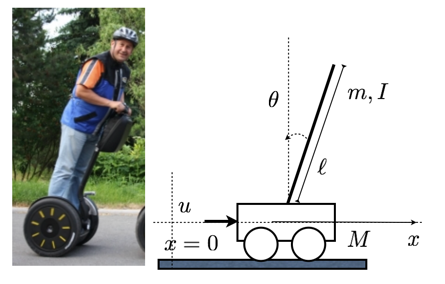
<center>Figure 1: Inverted pendulum</center>

The linearized model (see [1, p. 32]) is

$$(I+m\ell^2)\ddot{\theta}-mh\ell\theta = m\ell \ddot{x}$$

$$ (M+m)\ddot{x}+b\dot{x}-m\ell \ddot{\theta}=u$$

which can be written is state space form as



$$\frac{d}{dt}\left[\matrix{x \cr \dot{x} \cr \theta   \cr \dot{\theta} }\right] 
= \left[\matrix{0 & 1 & 0 & 0 \cr 0 & -\frac{(I+m\ell^2)b}{q} & \frac{m^2g\ell^2}{q} 
&0 \cr 0 & 0 & 0 & 1   \cr 0 & -\frac{m\ell b}{q} & \frac{m g\ell (M+m)}{q} 
&0 }\right]\left[\matrix{x \cr \dot{x} \cr \theta   \cr \dot{\theta} }\right]+\left[\matrix{0 
\cr \frac{I+m\ell^2}{q} \cr 0  \cr \frac{m\ell}{q} }\right]u$$

where $q=(I+m\ell^2)(M+m)-m^2\ell^2$. The following script synthesizes an 
LQR controller and plots the system reponses.

In [ ]:
import numpy as np
from scipy import signal
import scipy.linalg
from matplotlib import pyplot as plt
from course_functions import dlqr

In [ ]:
# definition of the continuous-time model
m = 0.2
M = 1
b = 0.05
I = 0.01
g = 9.8
l = 0.5
p = (I + m * (l ** 2)) * (M + m) - (m ** 2) * (l ** 2)

Ac = np.array([[0, 1, 0, 0],
               [0, -(I + m * (l ** 2)) * b / p, ((m ** 2) * g * (l ** 2)) / p, 0],
               [0, 0, 0, 1],
               [0, -(m * l * b) / p, (m * g * l * (M + m)) / p, 0]])

Bc = np.array([[0],
               [(I + m * (l ** 2)) / p],
               [0],
               [m * l / p]])
# discretization
n = 4
tau = 0.1

A, B = signal.cont2discrete((Ac, Bc, np.zeros((1, n)), 0), tau)[:2]

In [ ]:
# obtain the gains for LQR control
Q = np.eye(4, 4)
S = np.zeros((4, 1))
R = 1
[K, X, eigVals] = dlqr(A, B, Q, R)
K = -K

In [ ]:
# simulation
kend = np.int(10/tau)
x0 = np.array([[1], [0], [0], [0]])
x = np.zeros((x0.size, kend+1))
u = np.zeros(kend)
x[:,[0]] = x0
for k in range(kend):
    u[k] = K @ x[:, k]
    x[:, [k+1]] = A @ x[:, [k]] + B * u[k]

In [ ]:
#plots
t_step = np.arange(1,kend+1)*tau
plt.figure
plt.plot(t_step, u);

In [ ]:
plt.figure
plt.plot(t_step, x[2, 0:-1]);

In [ ]:
plt.figure
plt.plot(t_step, x[0, 0:-1]);

 [1] Feedback control of dynamic systems, Franklin, Powell, Emani-Naeini